1) Постройте последний график методических указаний в исходном пространстве признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


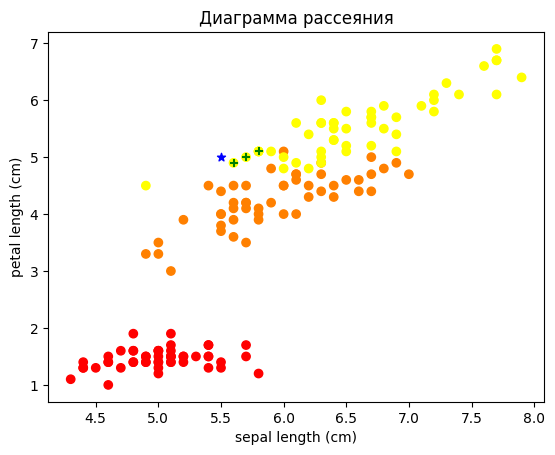

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
features = iris.data

X = pd.DataFrame(features, columns = iris.feature_names).iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

2) Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


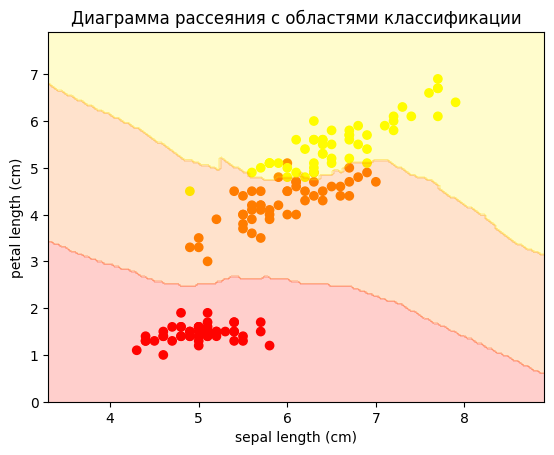

In [ ]:
import numpy as np
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_scaled, y)

y_pred = knn1.predict(X_scaled)

X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn1.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

3) Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


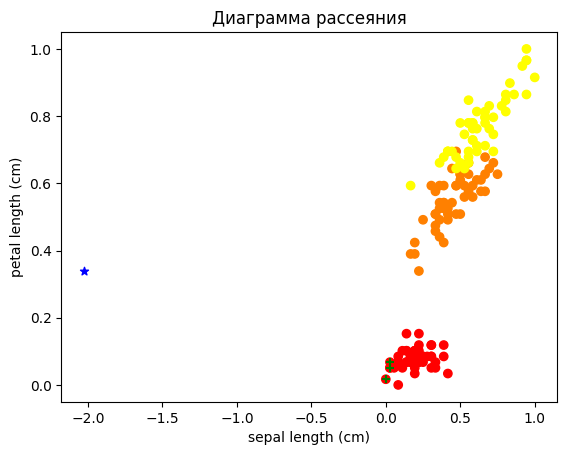

In [ ]:
observation_new = [[-3, 3]]
observation_new_scaled = scaler.transform(observation_new)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()


4) Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


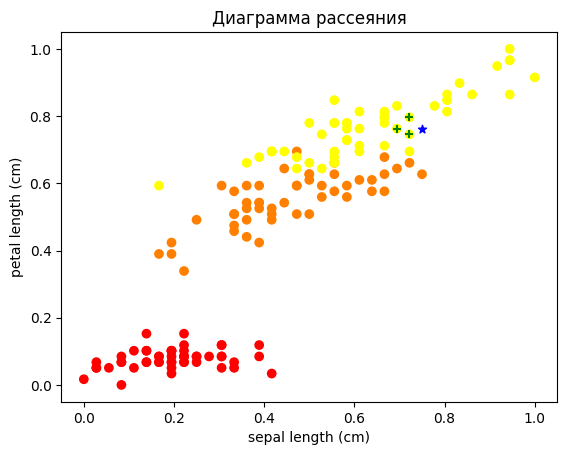

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


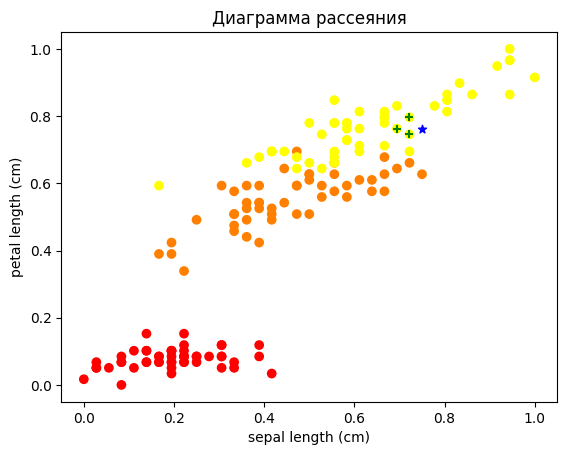

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


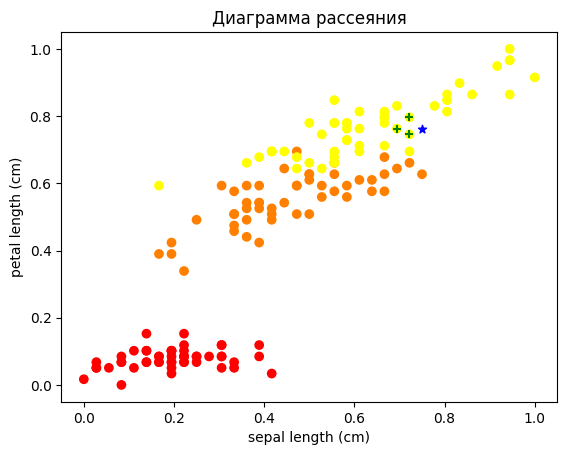

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


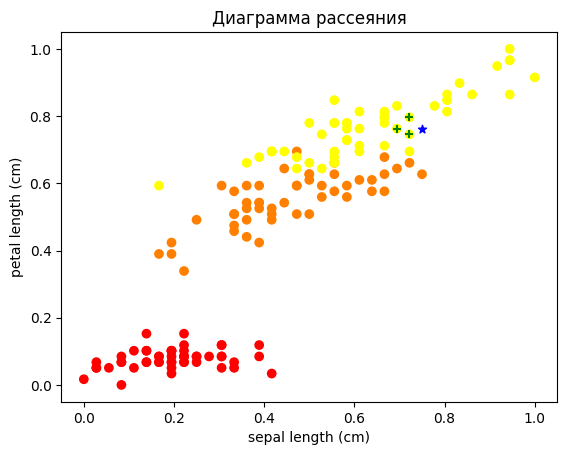

In [ ]:
def draw_neighb(point, knn):
  observation_new_scaled = scaler.transform(point)

  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

  plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

  distances, indices = knn.kneighbors(observation_new_scaled)

  plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
  plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
  plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

  plt.title("Диаграмма рассеяния")
  plt.xlabel('sepal length (cm)')
  plt.ylabel('petal length (cm)')
  plt.show()

iris = load_iris()
features = iris.data

X = pd.DataFrame(features, columns = iris.feature_names).iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
models = [KNeighborsClassifier(n_neighbors=3, metric=metric) for metric in metrics]

point = [[7, 5.5]]
knn=7

for model in models:
    model.fit(X_scaled, y)
    draw_neighb(point, model)

5) Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

iris = load_iris()
features = iris.data
X = pd.DataFrame(features, columns = iris.feature_names)
y = iris.target

def learn_knn(x, y, k):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_scaled, y)

  y_pred = knn.predict(X_scaled)

  print(classification_report(y_pred, y))

k_ = [1, 25, 50, 100]

for i in k_:
  print("-"*22, 'K = ', i, '-'*22)
  learn_knn(X, y, i)


---------------------- K =  1 ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

---------------------- K =  25 ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        51
           2       0.92      0.94      0.93        49

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

---------------------- K =  50 ----------------------
              precision    recall  f1-score   support

           0       1.0

6) Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



7) Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

Text(0, 0.5, 'accuracy')

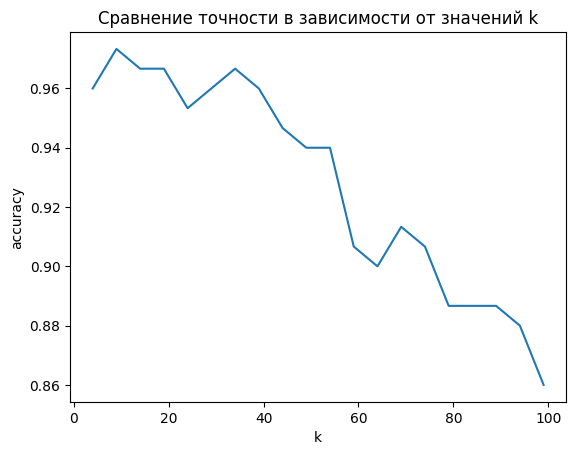

In [ ]:
from sklearn.metrics import accuracy_score

def test_accuracy(x, y, k):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_scaled, y)

  y_pred = knn.predict(X_scaled)
  return accuracy_score(y, y_pred)

iris = load_iris()
features = iris.data
X = pd.DataFrame(features, columns = iris.feature_names)
y = iris.target

accur = list(map(lambda k: test_accuracy(X, y, k), np.arange(4, 100, 5)))
plt.plot(np.arange(4, 100, 5), accur)

plt.title("Сравнение точности в зависимости от значений k")
plt.xlabel('k')
plt.ylabel('accuracy')

8) Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

california_housing = fetch_california_housing()

X = california_housing.data
y = california_housing.target

neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X, y)

mean_squared_error(y, neigh.predict(X))

0.9588551674010954